# **Prediksi Jumlah Muatan Barang di Bandara Soekarno-Hatta untuk Penerbangan Domistik**


---



# **Pendahuluan**#



## **Latar Belakang**

Bandara Soekarno-Hatta merupakan salah satu hub transportasi udara terbesar di Indonesia yang berperan penting dalam mendukung mobilitas barang domestik. Untuk menghadapi tantangan operasional seperti fluktuasi jumlah muatan barang yang dipengaruhi oleh faktor musiman, ekonomi, dan kebijakan logistik, pengelola bandara perlu memanfaatkan teknologi prediksi guna meningkatkan efisiensi operasional dan pelayanan logistik. Proyek ini berfokus pada pemodelan time series untuk memprediksi jumlah muatan barang domestik di masa mendatang, sehingga membantu pengelola bandara dan maskapai dalam pengambilan keputusan yang lebih tepat dan strategis.

Visi Bandara Soekarno-Hatta adalah menjadi bandara kelas dunia yang mendukung transportasi udara domestik dan internasional dengan efisiensi tinggi dan pelayanan terbaik. Dengan misi untuk menyediakan fasilitas logistik yang aman, cepat, dan terintegrasi, pengelola bandara mengadopsi strategi berbasis digitalisasi dan optimasi sumber daya guna meningkatkan kualitas pelayanan serta mendukung pertumbuhan sektor logistik di Indonesia. Proyek prediksi ini bertujuan untuk memberikan pemahaman lebih baik terhadap pola muatan barang dan mendukung pengambilan keputusan dalam hal pengelolaan kapasitas kargo serta perencanaan logistik.

Tujuan utama dari proyek ini adalah untuk membuat model yang memiliki akurasi tinggi dalam memprediksi jumlah muatan barang, sehingga mampu meminimalkan perbedaan nilai prediksi dengan data aktual serta mendukung perencanaan logistik yang lebih optimal.

## **Pernyataan Masalah**#
1.   Bagaimana Cara Membangun Model yang Akurat dalam Memprediksi Jumlah Muatan Barang di Bandara Soekarno-Hatta untuk Penerbangan Domestik?




## **Tujuan**#
Memprediksi jumlah muatan barang untuk penerbangan domestik di Bandara Soekarno-Hatta dengan akurasi tinggi, guna mendukung efisiensi operasional dan perencanaan logistik yang lebih baik.

# **Metodologi Penelitian**

### **Pemahaman Data**

---



#### **Pengumpulan Data**
Saya menggunakan data dari website Pusat Data Statistik(BPS), dengan cakupan muatan barang yang diangkut di Bandara Soekarno-Hatta untuk penerbangan domestik dari tahun 2006 hingga 2023. Data ini digunakan untuk menganalisis tren dan pola, yang dapat dijadikan acuan dalam pengambilan keputusan serta perencanaan yang lebih efektif di masa mendatang.

In [1]:
# import libary yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import tensorflow as tf


In [2]:
# mengambil data dan menampilkan
df = pd.read_csv('https://raw.githubusercontent.com/alihasan313/psd/main/Muatan-barang.csv', sep=';')
df.head()

,tanggal,barang
0,2006-01,10.450
1,2006-02,8.365
2,2006-03,9.474
3,2006-04,9.265
4,2006-05,9.401


In [3]:
# menampilkan info tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tanggal  216 non-null    object 
 1   barang   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


Mengonversi tanggal menjdai tipe data datetime

In [4]:
# mengonversi tanggal
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True, format='%Y-%m').dt.date
# Membuat kolom tanggal menjadi index
df.set_index('tanggal', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2006-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   barang  216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


#### **Mengencek data null pada data**

In [5]:
print(df.isnull().sum())

barang    0
dtype: int64


#### **Visualisai data**

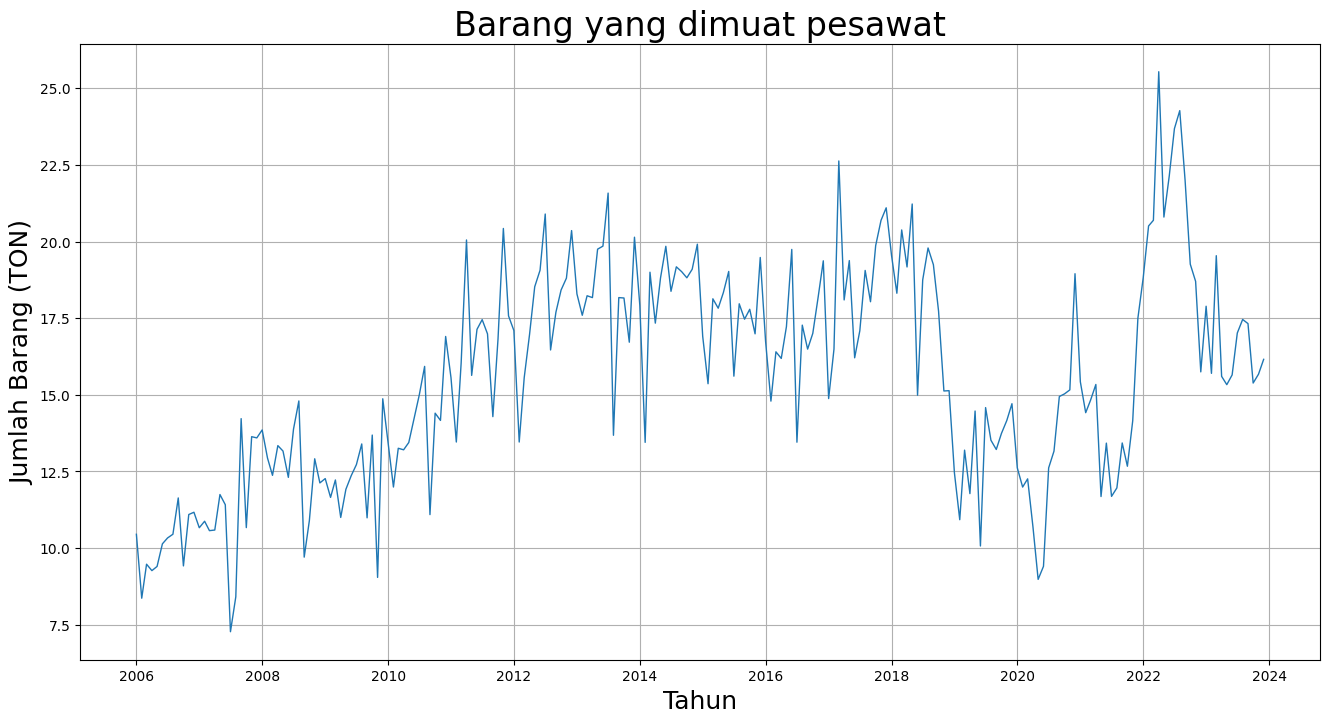

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Barang yang dimuat pesawat", fontsize=24)
plt.ylabel('Jumlah Barang (TON)', fontsize=18)
plt.xlabel('Tahun', fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df['barang'], linewidth=1.0, dashes=False, ax=ax1)
ax1.grid(True)
plt.show()

---

### **Prapemrosesan Data**






#### **Normalisasi**

In [7]:
def normalize(df):
    from sklearn.preprocessing import RobustScaler, MinMaxScaler

    np_data_unscaled = np.array(df)
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(np_data_unscaled)
    print(np_data_unscaled)
    normalized_df = pd.DataFrame(np_data_scaled, columns=df.columns, index=df.index)
    pd.set_option('display.float_format', '{:.4f}'.format)  # Menampilkan 4 desimal
    return normalized_df, scaler

normalized_df, scaler = normalize(df)
normalized_df

[[10.45 ]
 [ 8.365]
 [ 9.474]
 [ 9.265]
 [ 9.401]
 [10.139]
 [10.331]
 [10.452]
 [11.636]
 [ 9.419]
 [11.095]
 [11.169]
 [10.664]
 [10.876]
 [10.569]
 [10.589]
 [11.747]
 [11.415]
 [ 7.272]
 [ 8.411]
 [14.223]
 [10.668]
 [13.634]
 [13.595]
 [13.854]
 [12.937]
 [12.373]
 [13.343]
 [13.165]
 [12.307]
 [13.882]
 [14.8  ]
 [ 9.705]
 [10.898]
 [12.913]
 [12.126]
 [12.267]
 [11.654]
 [12.222]
 [11.   ]
 [11.918]
 [12.364]
 [12.723]
 [13.397]
 [10.987]
 [13.687]
 [ 9.044]
 [14.871]
 [13.439]
 [11.992]
 [13.256]
 [13.206]
 [13.444]
 [14.231]
 [14.997]
 [15.927]
 [11.092]
 [14.401]
 [14.165]
 [16.903]
 [15.56 ]
 [13.46 ]
 [16.037]
 [20.051]
 [15.634]
 [17.136]
 [17.452]
 [16.987]
 [14.288]
 [16.824]
 [20.426]
 [17.574]
 [17.097]
 [13.46 ]
 [15.559]
 [16.969]
 [18.525]
 [19.064]
 [20.897]
 [16.463]
 [17.693]
 [18.418]
 [18.805]
 [20.357]
 [18.291]
 [17.594]
 [18.231]
 [18.171]
 [19.751]
 [19.85 ]
 [21.58 ]
 [13.68 ]
 [18.171]
 [18.158]
 [16.716]
 [20.141]
 [17.919]
 [13.449]
 [18.999]
 [17.338]


,barang
tanggal,
2006-01-01,0.1740
2006-02-01,0.0598
2006-03-01,0.1205
2006-04-01,0.1091
2006-05-01,0.1165
...,...
2023-08-01,0.5576
2023-09-01,0.5502
2023-10-01,0.4441


In [8]:
def sliding_window(data, lag):
    series = data['barang']
    result = pd.DataFrame()
    for l in lag:
        result[f'xt-{l}'] = series.shift(l)

    result['xt'] = series[l:]
    result = result.dropna()
    result.index = series.index[l:]  # Mengatur index sesuai dengan nilai lag
    return result

windowed_data = sliding_window(df, [1, 2, 3])
windowed_data = windowed_data[['xt', 'xt-1', 'xt-2', 'xt-3']]
windowed_data

,xt,xt-1,xt-2,xt-3
tanggal,,,,
2006-04-01,9.2650,9.4740,8.3650,10.4500
2006-05-01,9.4010,9.2650,9.4740,8.3650
2006-06-01,10.1390,9.4010,9.2650,9.4740
2006-07-01,10.3310,10.1390,9.4010,9.2650
2006-08-01,10.4520,10.3310,10.1390,9.4010
...,...,...,...,...
2023-08-01,17.4580,17.0160,15.6490,15.3310
2023-09-01,17.3230,17.4580,17.0160,15.6490
2023-10-01,15.3840,17.3230,17.4580,17.0160


In [9]:
windowed_data.to_csv("muatan-barang-window.csv", index=False)

#### **Membagi Data**

In [10]:
def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)

    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]

    return x_train, y_train, x_test, y_test

input_df = windowed_data[['xt-1', 'xt-2', 'xt-3']]
target_df = windowed_data[['xt']]

x_train, y_train, x_test, y_test = split_data(input_df, target_df, 0.8)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (170, 3)
y_train shape: (170, 1)
X_test shape: (43, 3)
y_test shape: (43, 1)




---
### **Pemodelan**



#### **Linier Regression**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# Melakukan prediksi
y_pred = linear_model.predict(x_test)

# Menghitung error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse," %")
print("Root Mean Squared Error (RMSE):", rmse," %")
print("Mean Absolute Percentage Error (MAPE):", mape, " %")

Mean Squared Error (MSE): 4.866492726617241  %
Root Mean Squared Error (RMSE): 2.2060128573100477  %
Mean Absolute Percentage Error (MAPE): 0.10873957648914868  %


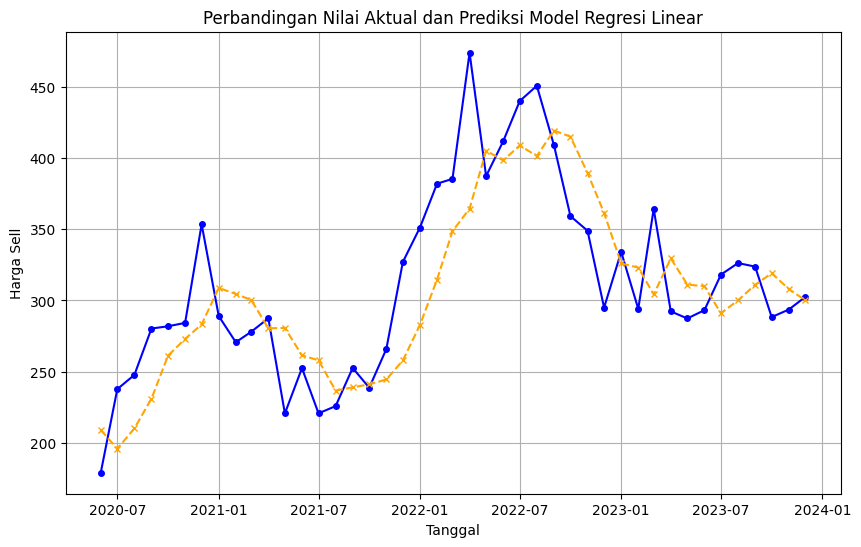

In [13]:
# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, scaler.inverse_transform(y_test.values.reshape(-1, 1)), label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Sell')
plt.grid()
plt.show()

#### **Random Forest Regressor**

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Inisialisasi model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
model_rf.fit(x_train, y_train)

# Prediksi
y_pred_rf = model_rf.predict(x_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf * 100, "%")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor:
Mean Squared Error (MSE): 9.271851188062781
Root Mean Squared Error (RMSE): 3.044971459318261
Mean Absolute Percentage Error (MAPE): 13.13782360860084 %


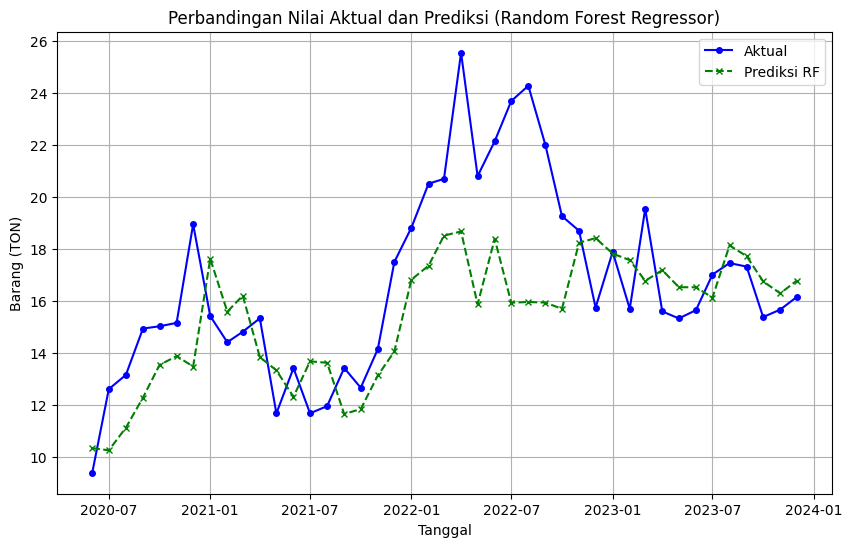

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Aktual", color="blue", marker="o", linestyle="-", markersize=4)
plt.plot(y_test.index, y_pred_rf, label="Prediksi RF", color="green", marker="x", linestyle="--", markersize=4)
plt.title("Perbandingan Nilai Aktual dan Prediksi (Random Forest Regressor)")
plt.xlabel("Tanggal")
plt.ylabel("Barang (TON)")
plt.legend()
plt.grid()
plt.show()


#### **Support Vector Regression**

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Scaling data (SVR membutuhkan data yang di-scale)
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
x_test_scaled = scaler_x.transform(x_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Membuat model SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train_scaled, y_train_scaled.ravel())

# Prediksi
y_pred_scaled = svr_model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape * 100, "%")


SVR:
Mean Squared Error (MSE): 10.094834440757104
Root Mean Squared Error (RMSE): 3.1772369192046575
Mean Absolute Percentage Error (MAPE): 14.115066953750514 %


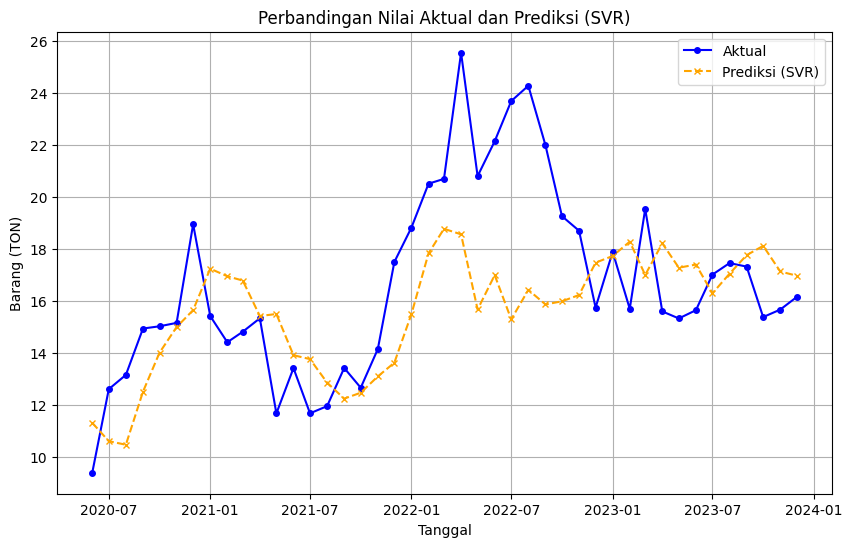

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot nilai aktual
plt.plot(y_test.index,y_test.values,label='Aktual',color='blue',marker='o',linestyle='-',markersize=4)
# Plot nilai prediksi
plt.plot(y_test.index,y_pred,label='Prediksi (SVR)',color='orange',marker='x',linestyle='--',markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi (SVR)')
plt.xlabel('Tanggal')
plt.ylabel('Barang (TON)')
plt.legend()
plt.grid()
plt.show()


#### **Bagging Regressor**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagging Regressor with Linear Regression:
Mean Squared Error (MSE): 4.882640359484598
Root Mean Squared Error (RMSE): 2.2096697399124148
Mean Absolute Percentage Error (MAPE): 0.10911718327046704  %


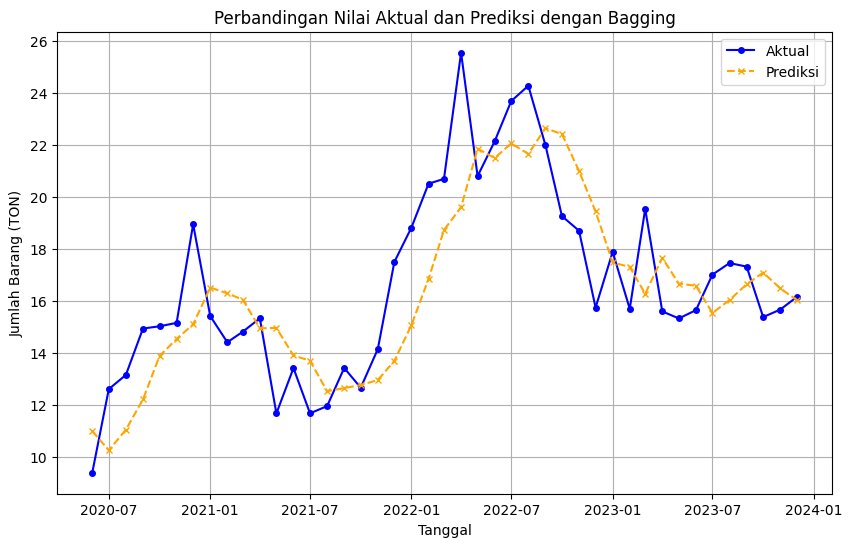

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Membuat model Linear Regression untuk Bagging
base_model = LinearRegression()

# Membuat model Bagging Regressor dengan Linear Regression sebagai estimator dasar
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)

# Latih model dengan data training
bagging_model.fit(x_train, y_train)

# Lakukan prediksi dengan data test
y_pred_bagging = bagging_model.predict(x_test)

# Menghitung error untuk evaluasi
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)

# Menampilkan hasil evaluasi
print("Bagging Regressor with Linear Regression:")
print("Mean Squared Error (MSE):", mse_bagging)
print("Root Mean Squared Error (RMSE):", rmse_bagging)
print("Mean Absolute Percentage Error (MAPE):", mape_bagging, " %")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, y_pred_bagging, label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi dengan Bagging')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Barang (TON)')
plt.grid()
plt.legend()
plt.show()


### **Evalusai**

#### **Grid Search**

In [19]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def grid_search(input_df, target_df, splits, estimators, bootstrap, max_samples):
    best_rmse = float('inf')
    best_params = None
    i = 0
    for split in splits:
        x_train, y_train, x_test, y_test = split_data(input_df, target_df, 0.8)
        for estimator in estimators:
            for bootstrap in bootstraps:
                for max_sample in max_samples:
                    base_model = LinearRegression()
                    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=estimator, bootstrap=bootstrap, max_samples=max_sample)
                    bagging_model.fit(x_train, y_train.values.ravel())
                    y_pred = bagging_model.predict(x_test)
                    i+=1
                    current_rmse = rmse(y_test, y_pred)
                    #print(f'Model {i} split: {split}, estimator: {estimator}, bootstrap: {bootstrap}, max sample: {max_sample}, RMSE: {current_rmse}')
                    if current_rmse < best_rmse:
                        best_rmse = current_rmse
                        best_model = bagging_model
                        best_params = {'estimator': estimator, 'bootstrap': bootstrap, 'train_sample': split, 'max_sample': max_sample}
                    tf.keras.backend.clear_session()
    return best_params, best_rmse, best_model

# Parameter untuk Grid Search
splits = [0.7, 0.75, 0.8, 0.85, 0.9]
estimators = [10, 20, 50, 100]
bootstraps = [True, False]
max_samples = [0.8, 0.9, 1.0]

best_params, best_rmse, best_model = grid_search(input_df, target_df, splits, estimators, bootstraps, max_samples)

In [20]:
# Parameter terbaik
print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

Best parameters: {'estimator': 20, 'bootstrap': True, 'train_sample': 0.9, 'max_sample': 0.9}
Best RMSE: 2.176956405945235


#### **Prediksi**

In [21]:
# Input data prediksi muatan barang pesawat untuk 3 bulan terakhir
muatan_bulan_ini = float(input("Muatan barang pesawat bulan ini: "))
muatan_bulan_sebelumnya = float(input("Muatan barang pesawat 1 bulan sebelumnya: "))
muatan_2_bulan_sebelumnya = float(input("Muatan barang pesawat 2 bulan sebelumnya: "))

# Menyusun data input menjadi array untuk perhitungan prediksi
# Menggunakan rata-rata perubahan muatan sebagai estimasi untuk bulan depan
rata_rata_perubahan = (
    (muatan_bulan_ini - muatan_bulan_sebelumnya) +
    (muatan_bulan_sebelumnya - muatan_2_bulan_sebelumnya)
) / 2

# Prediksi muatan bulan depan berdasarkan rata-rata perubahan
prediksi_muatan_bulan_depan = muatan_bulan_ini + rata_rata_perubahan

# Menghitung persentase perubahan prediksi dibandingkan muatan terakhir
percentage_change = ((prediksi_muatan_bulan_depan - muatan_bulan_ini) / muatan_bulan_ini) * 100
change_sign = '+' if percentage_change > 0 else ''

# Format hasil prediksi agar lebih mudah dibaca (mengganti koma dan titik sesuai format Indonesia)1
formatted_predicted_value = f"{prediksi_muatan_bulan_depan:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
formatted_last_muatan = f"{muatan_bulan_ini:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# Output hasil prediksi
print(f'Muatan barang pesawat bulan ini: {formatted_last_muatan} kg')
print(f'Prediksi muatan barang pesawat untuk bulan depan: {formatted_predicted_value} kg ({change_sign}{percentage_change:.2f}%)')


Muatan barang pesawat bulan ini: 15.672
Muatan barang pesawat 1 bulan sebelumnya: 15.384
Muatan barang pesawat 2 bulan sebelumnya: 17.323
Muatan barang pesawat bulan ini: 15,67 kg
Prediksi muatan barang pesawat untuk bulan depan: 14,85 kg (-5.27%)


In [23]:
# 15.672
# 15.384
# 17.323